# 🏡 House Price Prediction

This notebook for predicting house prices using data from the Kaggle competition [**House Prices - Advanced Regression Techniques**](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).
 

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# shape of the datasets
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
#  head of the training dataset
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
# columns of the training dataset
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Explotatory Data Analysis (EDA)

In [6]:
# our target variable is 'SalePrice'
# let's check the description of the target variable
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

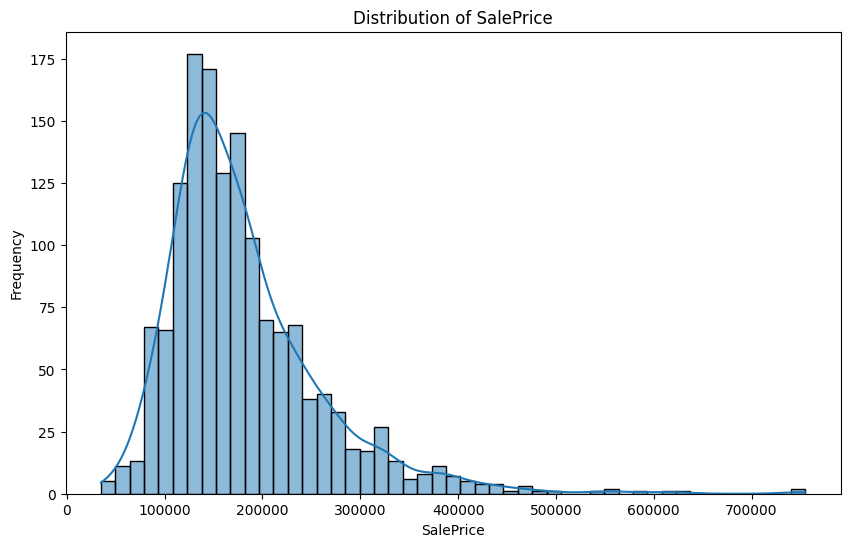

In [7]:
# Plot the distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

we find that the target variable 'SalePrice' is right-skewed, indicating that most houses have lower prices, with less houses having very high prices.

In [8]:
# skewness and kurtosis of the target variable
print(train['SalePrice'].skew())
print(train['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


This skewness suggests that the data does not follow a normal distribution, which could impact the performance of regression models that assume normality and homoscedasticity. To address this we have to take transformation of the SalePrice target variable.

## Relationship between selected features


In [9]:
# Feature label mappings

feature_labels = {
    'MSSubClass': 'Building Class (Type of dwelling)',
    'MSZoning': 'Zoning Classification',
    'LotFrontage': 'Lot Frontage (feet)',
    'LotArea': 'Lot Area (sq ft)',
    'Street': 'Street Type',
    'Alley': 'Alley Access Type',
    'LotShape': 'Lot Shape',
    'LandContour': 'Flatness of Property',
    'Utilities': 'Available Utilities',
    'LotConfig': 'Lot Configuration',
    'LandSlope': 'Land Slope',
    'Neighborhood': 'Neighborhood',
    'Condition1': 'Proximity to Main Road or Railroad',
    'Condition2': 'Proximity to 2nd Road or Railroad',
    'BldgType': 'Building Type',
    'HouseStyle': 'House Style',
    'OverallQual': 'Overall Material Quality',
    'OverallCond': 'Overall Condition Rating',
    'YearBuilt': 'Year Built',
    'YearRemodAdd': 'Year Remodeled',
    'RoofStyle': 'Roof Style',
    'RoofMatl': 'Roof Material',
    'Exterior1st': 'Exterior Covering 1',
    'Exterior2nd': 'Exterior Covering 2',
    'MasVnrType': 'Masonry Veneer Type',
    'MasVnrArea': 'Masonry Veneer Area (sq ft)',
    'ExterQual': 'Exterior Material Quality',
    'ExterCond': 'Exterior Condition',
    'Foundation': 'Foundation Type',
    'BsmtQual': 'Basement Height',
    'BsmtCond': 'Basement Condition',
    'BsmtExposure': 'Basement Exposure',
    'BsmtFinType1': 'Basement Finish Type 1',
    'BsmtFinSF1': 'Basement Finished SF1',
    'BsmtFinType2': 'Basement Finish Type 2',
    'BsmtFinSF2': 'Basement Finished SF2',
    'BsmtUnfSF': 'Unfinished Basement SF',
    'TotalBsmtSF': 'Total Basement Area (sq ft)',
    'Heating': 'Heating Type',
    'HeatingQC': 'Heating Quality & Condition',
    'CentralAir': 'Central Air Conditioning',
    'Electrical': 'Electrical System',
    '1stFlrSF': 'First Floor Area (sq ft)',
    '2ndFlrSF': 'Second Floor Area (sq ft)',
    'LowQualFinSF': 'Low Quality Finished Area',
    'GrLivArea': 'Above Ground Living Area (sq ft)',
    'BsmtFullBath': 'Basement Full Bathrooms',
    'BsmtHalfBath': 'Basement Half Bathrooms',
    'FullBath': 'Full Bathrooms (Above Ground)',
    'HalfBath': 'Half Bathrooms (Above Ground)',
    'BedroomAbvGr': 'Bedrooms Above Ground',
    'KitchenAbvGr': 'Kitchens Above Ground',
    'KitchenQual': 'Kitchen Quality',
    'TotRmsAbvGrd': 'Total Rooms Above Ground',
    'Functional': 'Functional Condition',
    'Fireplaces': 'Number of Fireplaces',
    'FireplaceQu': 'Fireplace Quality',
    'GarageType': 'Garage Location',
    'GarageYrBlt': 'Garage Year Built',
    'GarageFinish': 'Garage Interior Finish',
    'GarageCars': 'Garage Capacity (Cars)',
    'GarageArea': 'Garage Area (sq ft)',
    'GarageQual': 'Garage Quality',
    'GarageCond': 'Garage Condition',
    'PavedDrive': 'Paved Driveway',
    'WoodDeckSF': 'Wood Deck Area (sq ft)',
    'OpenPorchSF': 'Open Porch Area (sq ft)',
    'EnclosedPorch': 'Enclosed Porch Area (sq ft)',
    '3SsnPorch': 'Three Season Porch Area',
    'ScreenPorch': 'Screen Porch Area',
    'PoolArea': 'Pool Area (sq ft)',
    'PoolQC': 'Pool Quality',
    'Fence': 'Fence Quality',
    'MiscFeature': 'Miscellaneous Feature',
    'MiscVal': 'Miscellaneous Value ($)',
    'MoSold': 'Month Sold',
    'YrSold': 'Year Sold',
    'SaleType': 'Sale Type',
    'SaleCondition': 'Sale Condition',
    'SalePrice': 'Sale Price ($)'
}


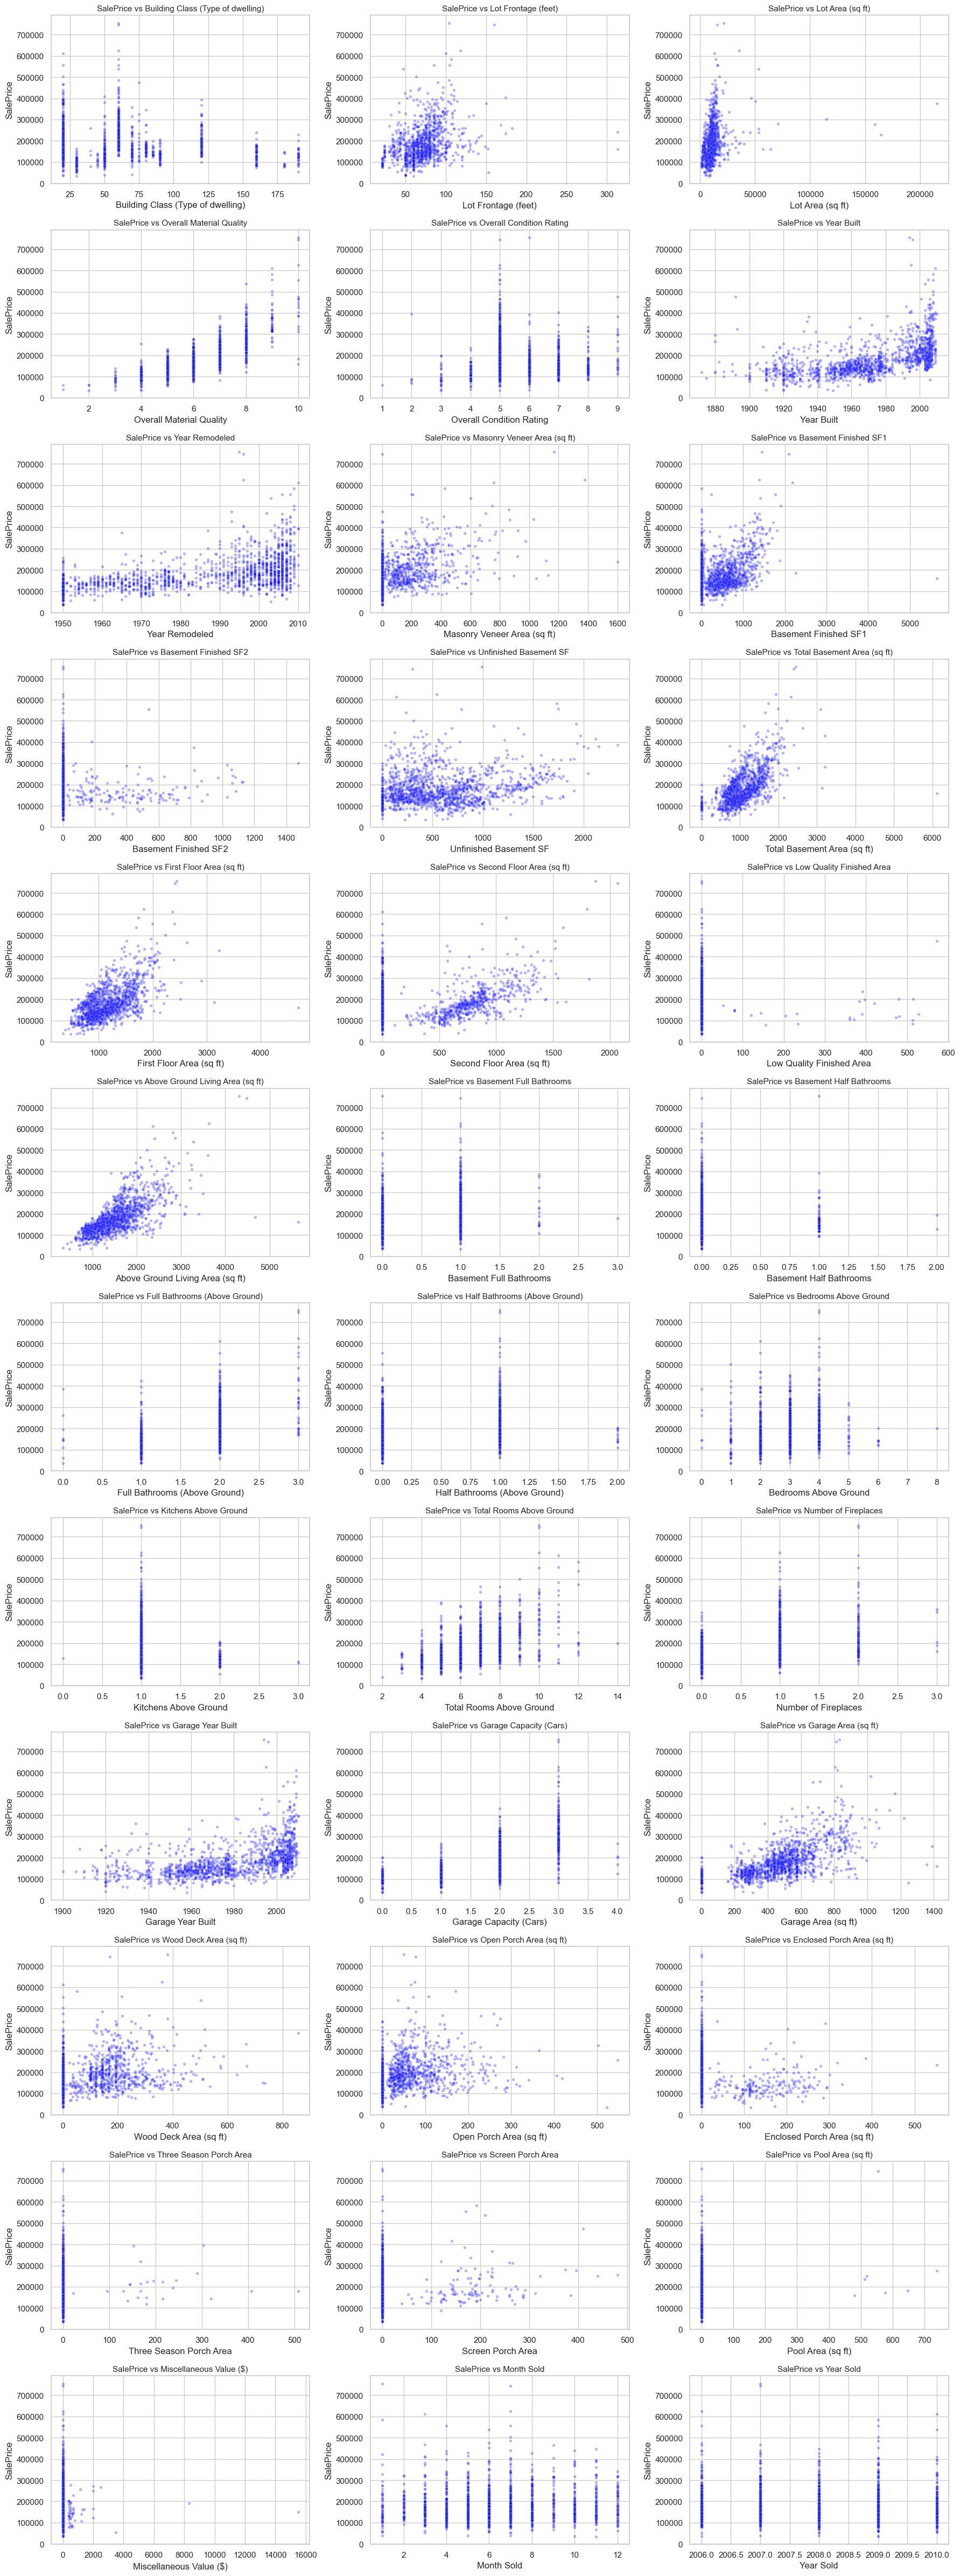

In [10]:
# Drop Id and SalePrice from numeric features
numeric_cols = train.select_dtypes(include=[np.number]).columns.drop(['Id', 'SalePrice']) 
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
sns.set(style="whitegrid")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Scatter plots with  labels
for i, col in enumerate(numeric_cols):
    label = feature_labels.get(col, col) 
    sns.scatterplot(
        x=train[col],
        y=train['SalePrice'],
        alpha=0.3,
        s=15,
        ax=axes[i],
        color='blue'
    )
    axes[i].set_title(f'SalePrice vs {label}', fontsize=11)
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('SalePrice') 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


C:\Users\COM\AppData\Local\Temp\ipykernel_12164\1198073989.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\COM\AppData\Local\Temp\ipykernel_12164\1198073989.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\COM\AppData\Local\Temp\ipykernel_12164\1198073989.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\COM\AppData\Local\Temp\ipykernel_12164\1198073989.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

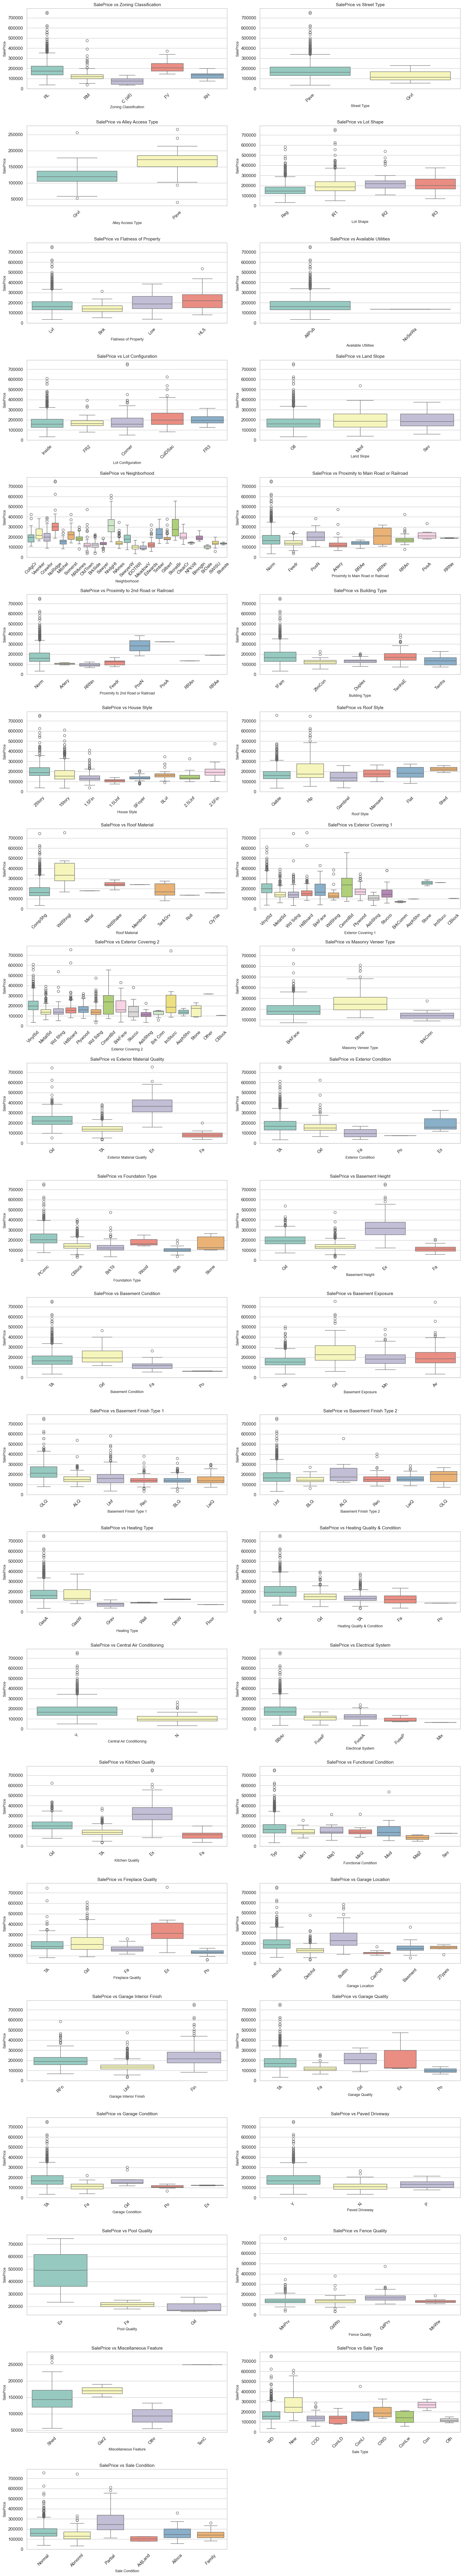

In [11]:
# categorical columns
cat_cols = train.select_dtypes(include=['object', 'category']).columns 
n_cols = 2
n_rows = int(np.ceil(len(cat_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

# boxplots
for i, col in enumerate(cat_cols):
    label = feature_labels.get(col, col)
    sns.boxplot(
        x=train[col],
        y=train['SalePrice'],
        ax=axes[i],
        palette='Set3'
    )
    axes[i].set_title(f'SalePrice vs {label}', fontsize=11)
    axes[i].set_xlabel(label, fontsize=9)
    axes[i].set_ylabel('SalePrice', fontsize=9)
    axes[i].tick_params(axis='x', rotation=45) 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


From above plots we can get basic idea of realtionship with sales price and features

Now we can see  specefic features

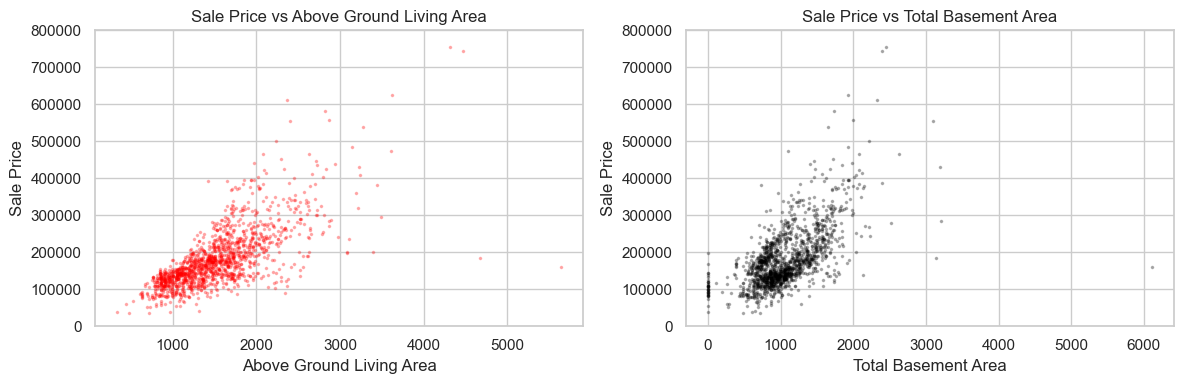

In [12]:
# plot above ground living area and total basement area against sale price
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(train['GrLivArea'], train['SalePrice'], color='red', alpha=0.25, s=10, marker='.')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Above Ground Living Area')
plt.ylim(0, 800000)

plt.subplot(1, 2, 2)
plt.scatter(train['TotalBsmtSF'], train['SalePrice'], color='black', alpha=0.25, s=10, marker='.')
plt.xlabel('Total Basement Area')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Total Basement Area')
plt.ylim(0, 800000)

plt.tight_layout()
plt.show()


We can see that there is a linear relationship between SalePrice and GrLivArea whereas there's a slight exponential relationship with TotalBsmtSF



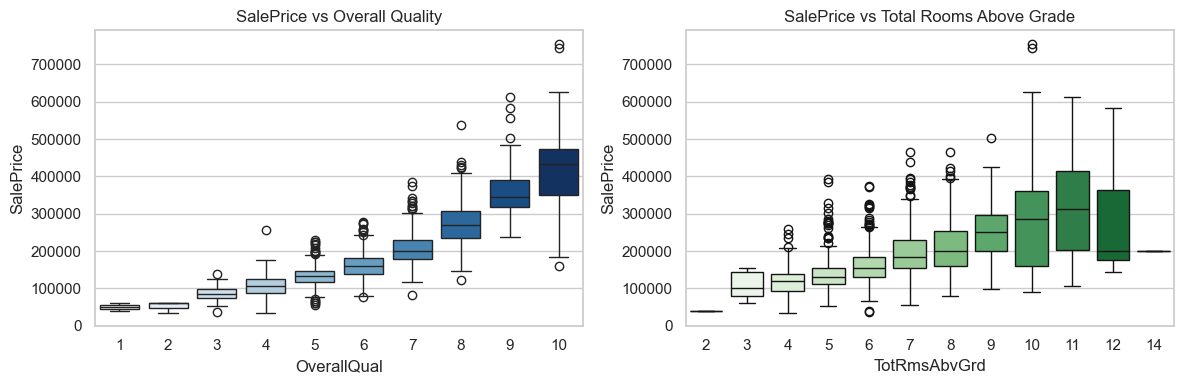

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

# Boxplot: OverallQual vs SalePrice
plt.subplot(1, 2, 1)
sns.boxplot(x='OverallQual', y='SalePrice', data=train, hue='OverallQual',
            palette='Blues', legend=False)
plt.title('SalePrice vs Overall Quality')

# Boxplot: TotRmsAbvGrd vs SalePrice
plt.subplot(1, 2, 2)
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=train, hue='TotRmsAbvGrd',
            palette='Greens', legend=False)
plt.title('SalePrice vs Total Rooms Above Grade')
plt.tight_layout()
plt.show()


The plot confirms that the higher the overall quality or the number of rooms, the higher the sale price though the effect is stronger for quality. 

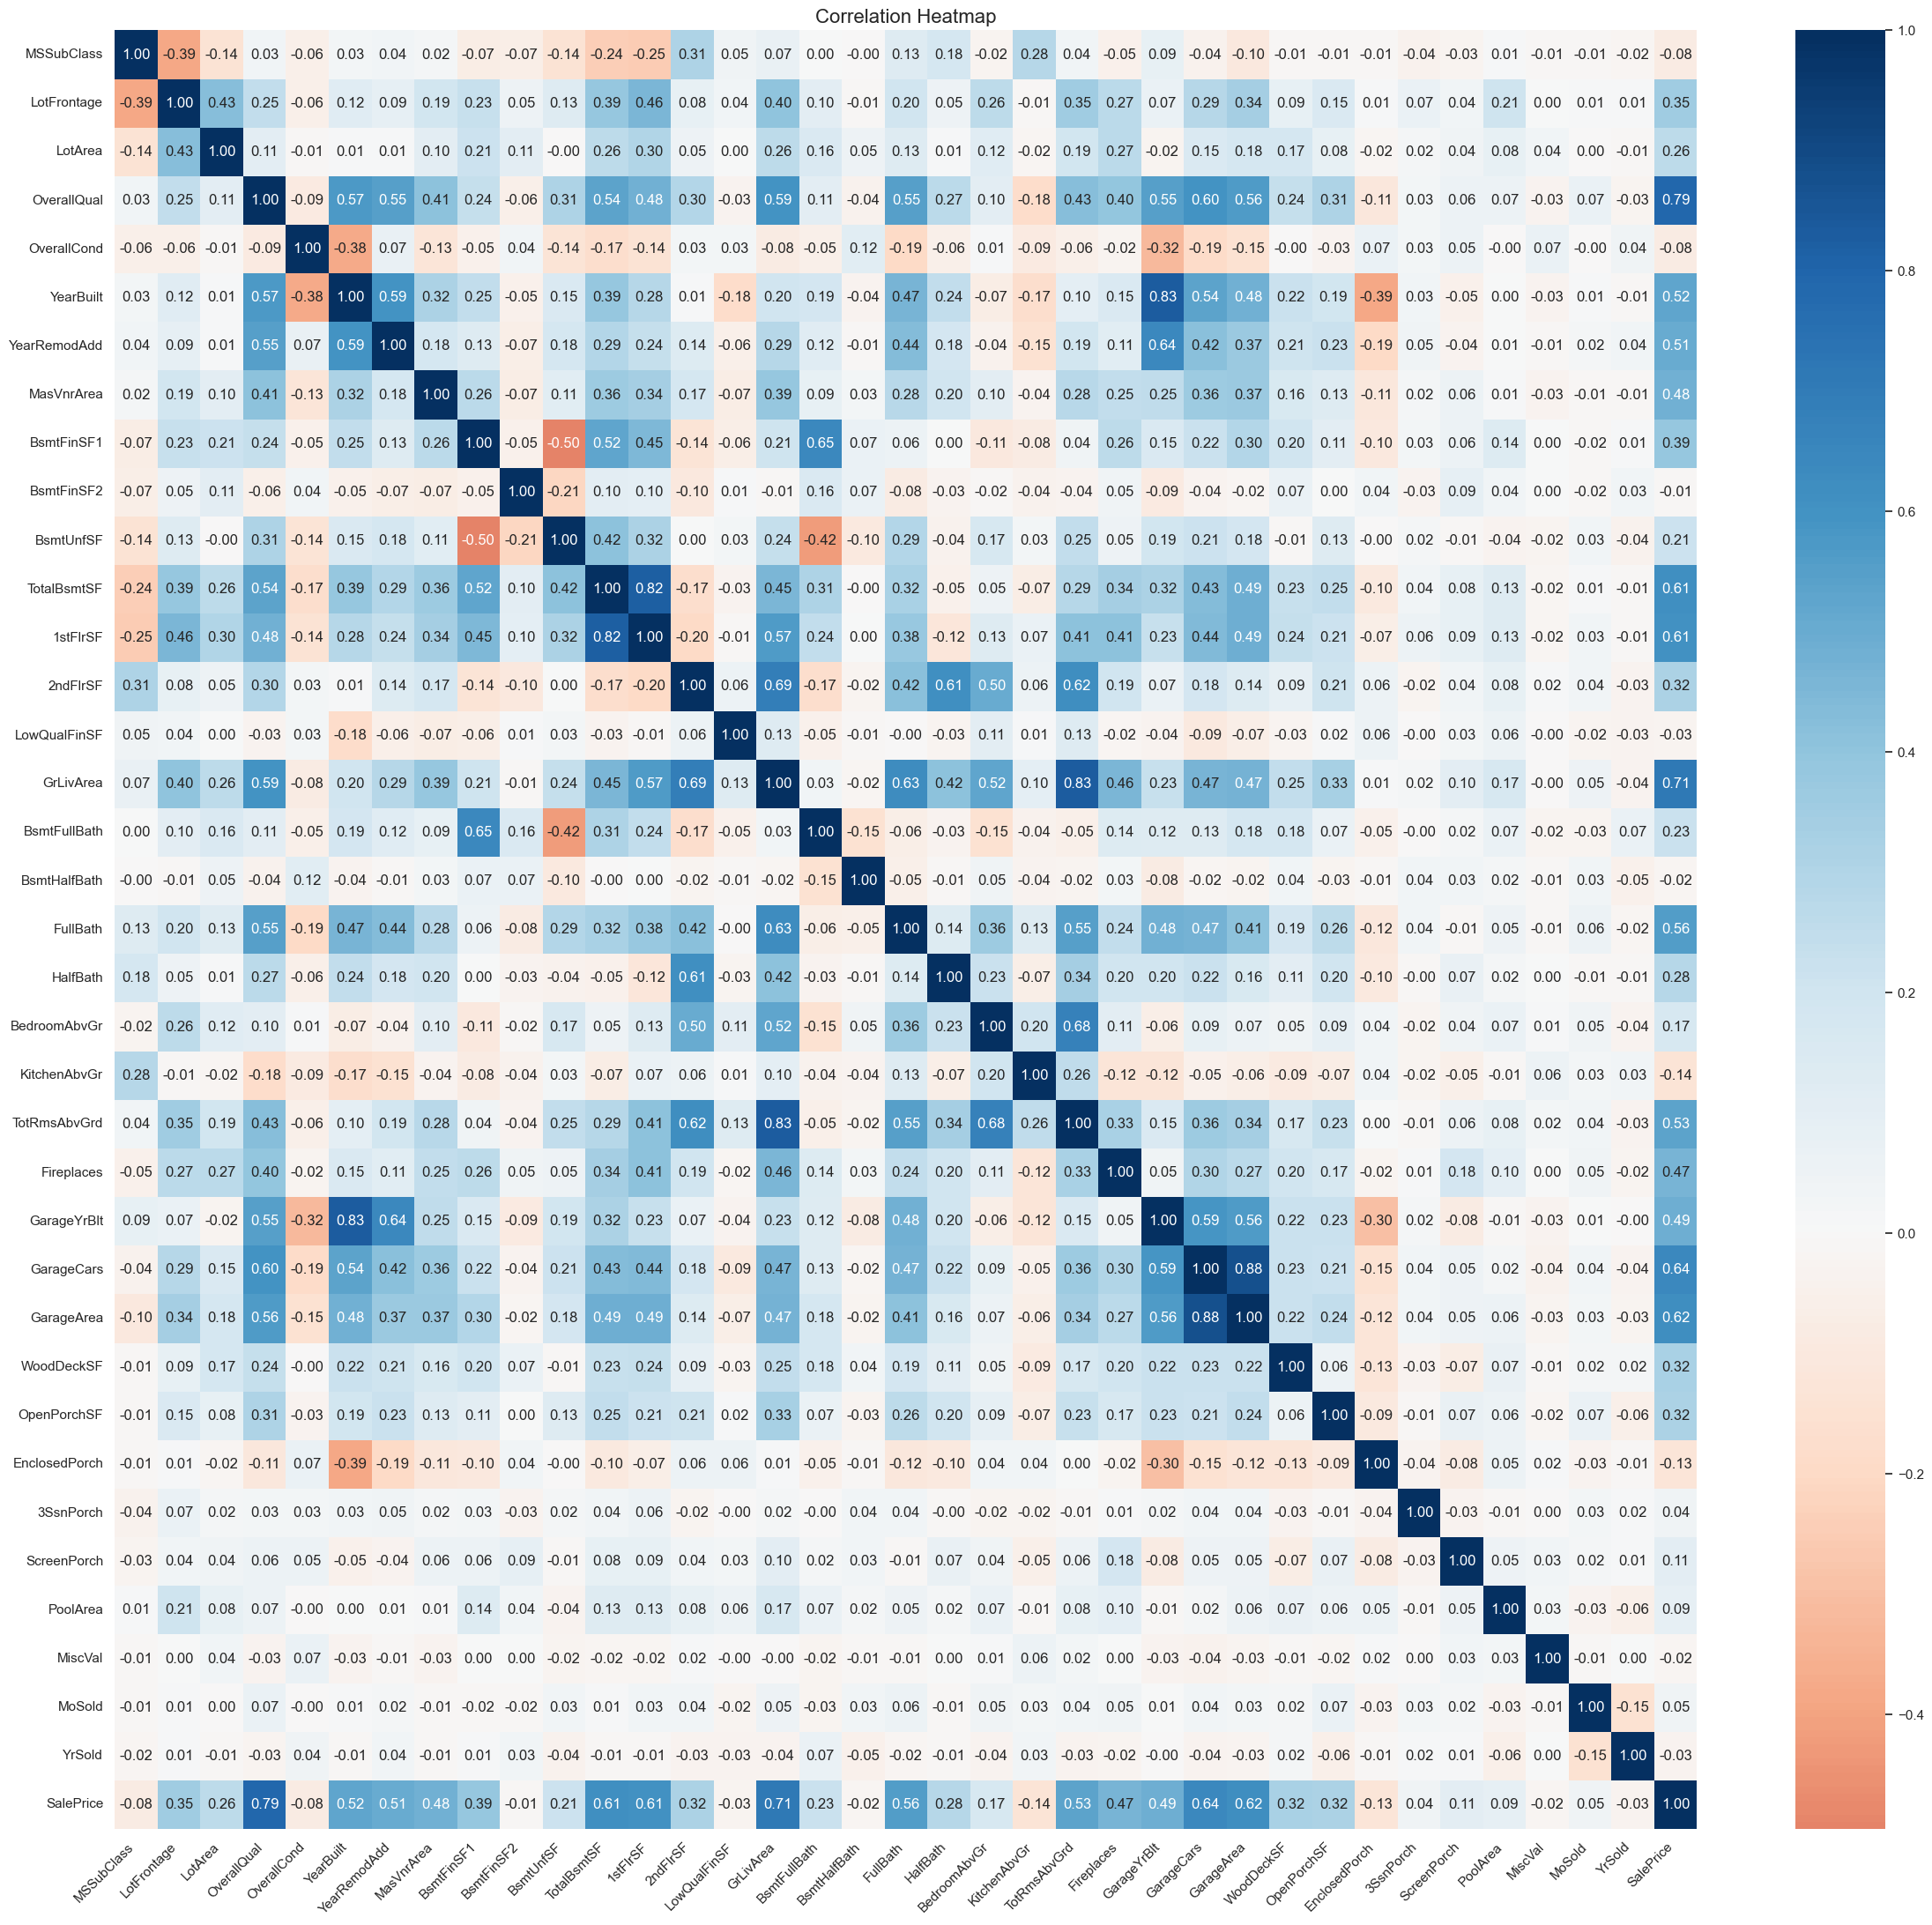

In [14]:
# Correlation heatmap numeric columns 
corr = train.select_dtypes(include='number').drop('Id', axis=1, errors='ignore').corr()

plt.figure(figsize=(24, 22))
sns.heatmap(corr, annot=True,fmt=".2f", cmap='RdBu', center=0)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


so features such as `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF`, `1stFlrSF`, `FullBath`, `TotRmsAbvGrd`, `YearBuilt`, and `YearRemodAdd` show strong correlation with the sale price of houses 

Additionally, multicollinearity is evident among some of these features. For instance, `GarageCars` and `GarageArea`, `TotRmsAbvGrd` and `BedroomAbvGr`, highly correlated with each other which is also obvious.


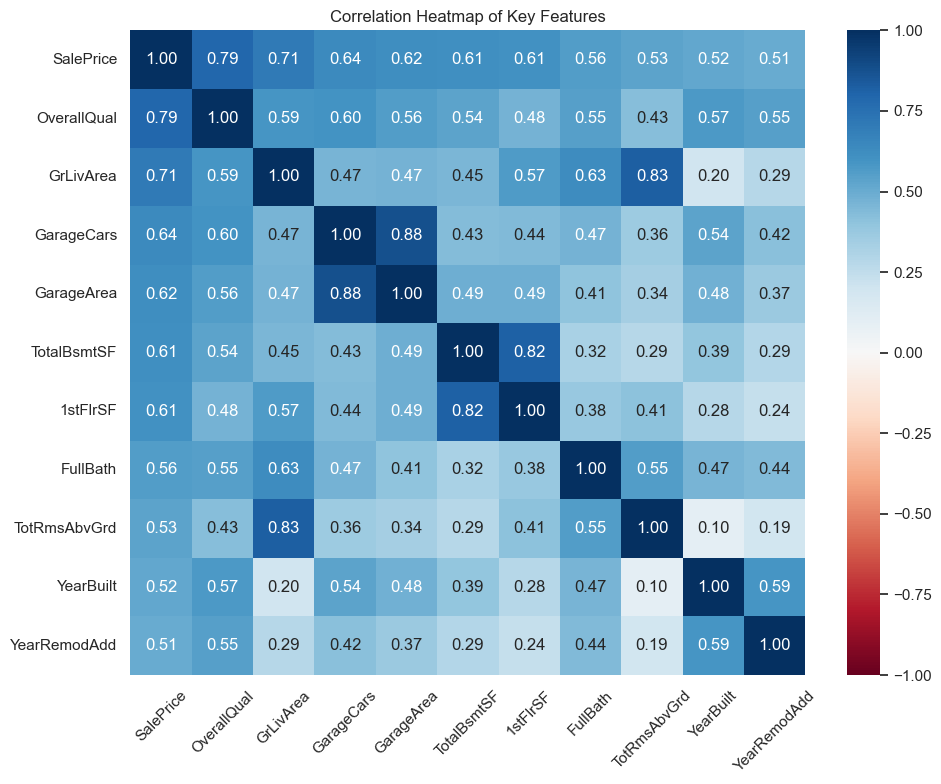

In [15]:
# Select key correlated variables
selected_features = [
    'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
    'YearBuilt', 'YearRemodAdd'
]
 
corr_matrix = train[selected_features].corr() 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0, vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap of Key Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


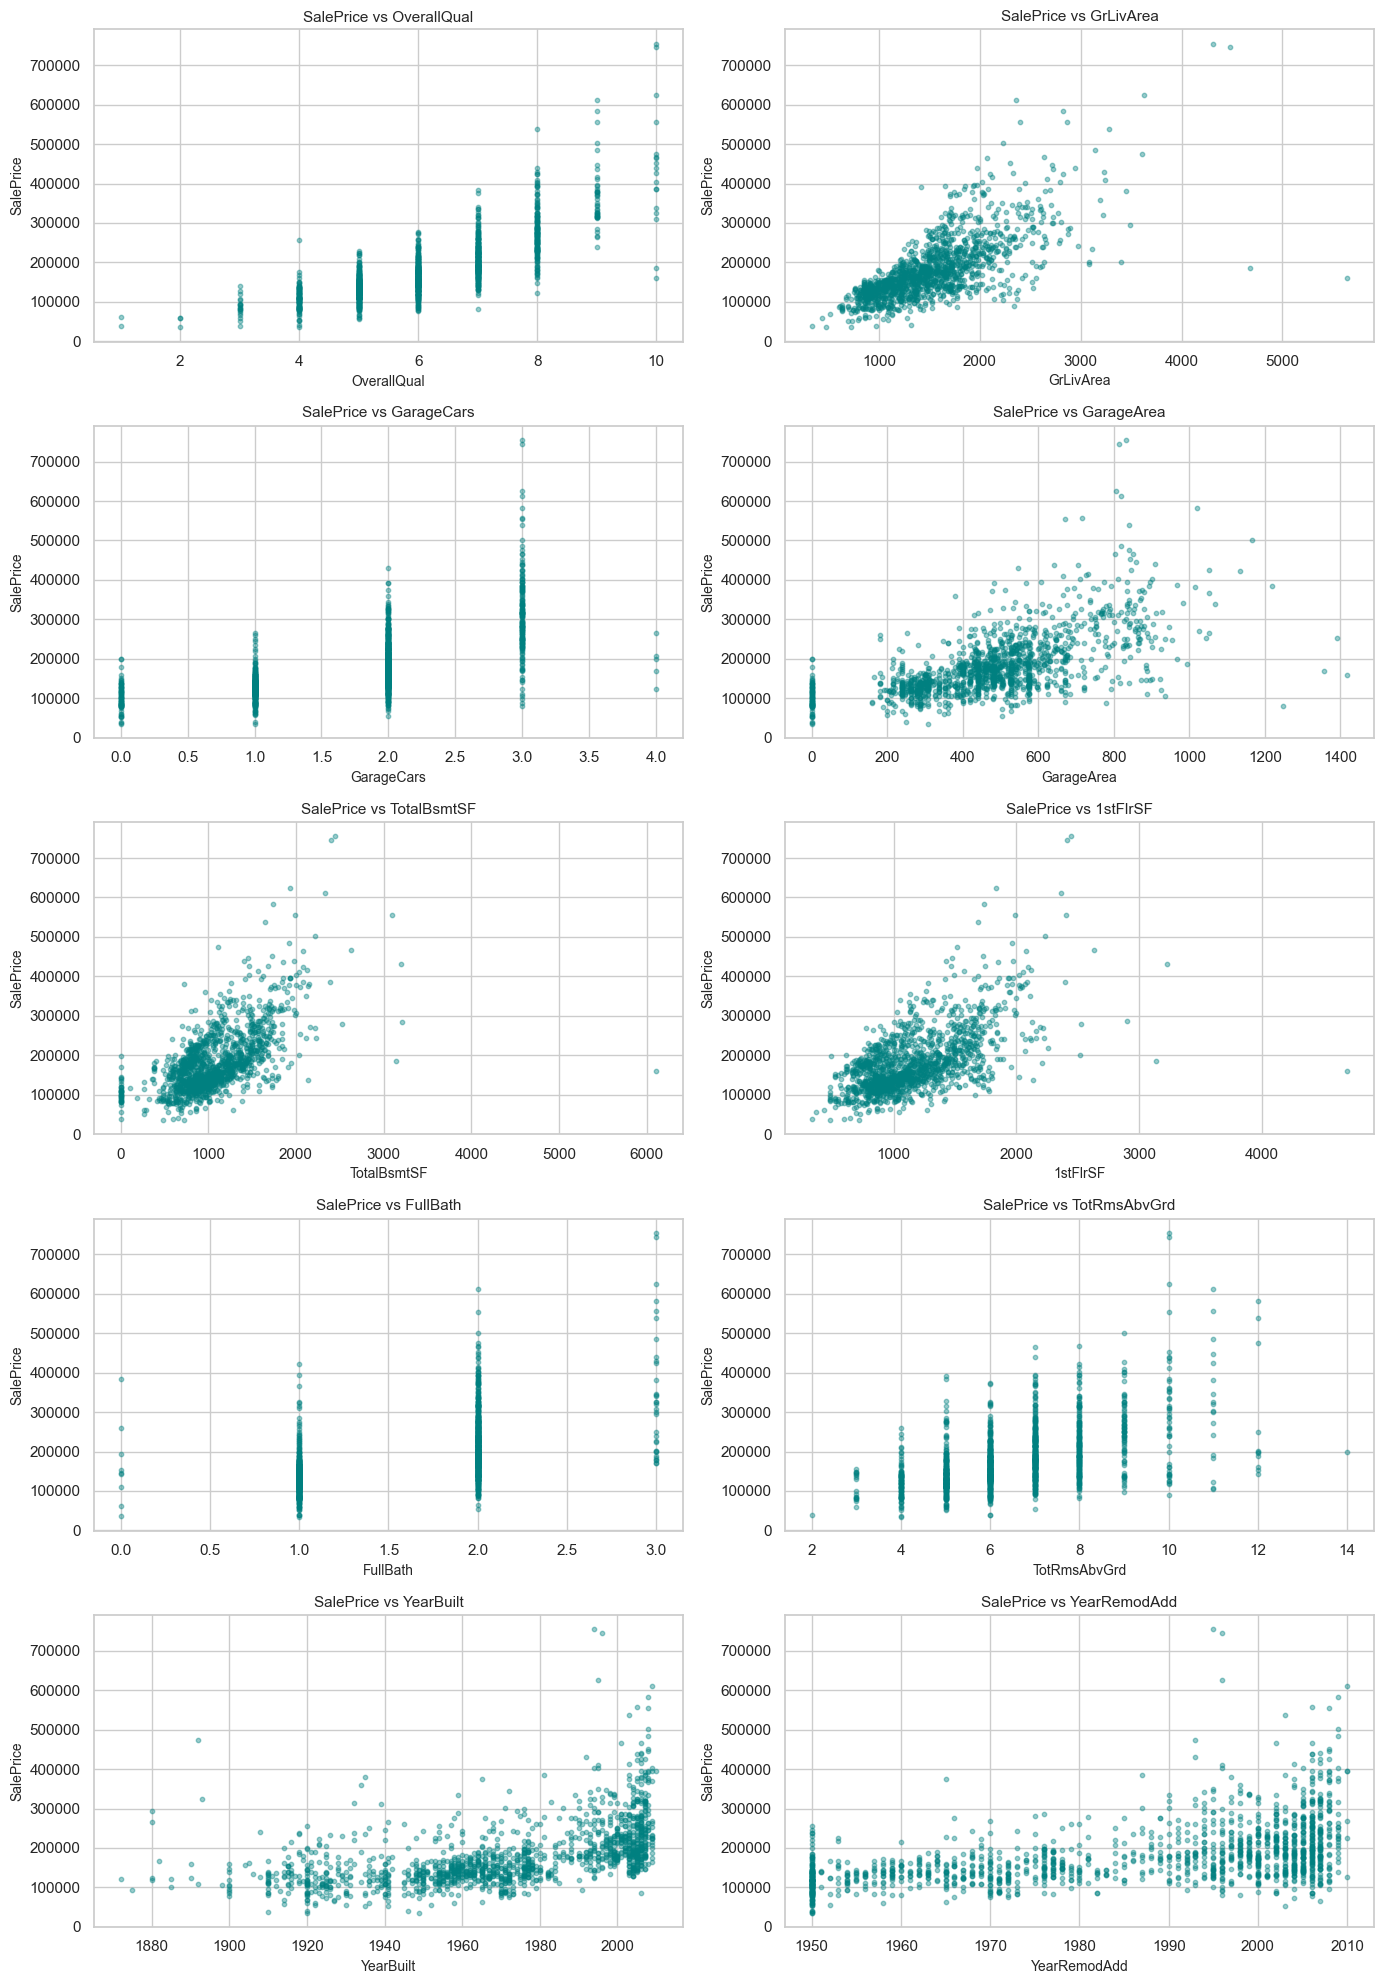

In [16]:
# Remove 'SalePrice' from x-axis features
features_to_plot = [feat for feat in selected_features if feat != 'SalePrice'] 
n_cols = 2
n_rows = int(np.ceil(len(features_to_plot) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
axes = axes.flatten()
 
for i, feature in enumerate(features_to_plot):
    axes[i].scatter(train[feature], train['SalePrice'], alpha=0.4, s=10, color='teal')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('SalePrice', fontsize=10)
    axes[i].set_title(f'SalePrice vs {feature}', fontsize=11)
 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
 
sns.set(style='ticks', color_codes=True)
sns.pairplot(train[selected_features], diag_kind='kde', height=2.5)
plt.show()


## Data Preprocessing

### Missing Data

In [ ]:
# Check missing values in the training set
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing values in train dataset:")
print(missing_values)

Missing values in train dataset:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


As our variables of interest don't have any missing values, we can skip imputing or removing missing values. As it will not affect the models. But we explore the data for missing values.

In [ ]:
print(train['FireplaceQu'].value_counts())

print(train['FireplaceQu'].value_counts().sum())


FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
770


In [ ]:
# print the rows where 'FireplaceQu' is null
train[train['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']]


Fireplaces FireplaceQu
0              0         NaN
5              0         NaN
10             0         NaN
12             0         NaN
15             0         NaN
...          ...         ...
1452           0         NaN
1453           0         NaN
1454           0         NaN
1458           0         NaN
1459           0         NaN

[690 rows x 2 columns]

here `FireplaceQu` is missing at places where FirePlaces feature is missing.

So, we can't do anything but fill these values with "Not avaliable".

In [ ]:
# unique values in 'MasVnrType'
train['MasVnrType'].unique()


array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [ ]:
train[train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]


MasVnrType  MasVnrArea
1           NaN         0.0
3           NaN         0.0
5           NaN         0.0
8           NaN         0.0
9           NaN         0.0
...         ...         ...
1454        NaN         0.0
1455        NaN         0.0
1457        NaN         0.0
1458        NaN         0.0
1459        NaN         0.0

[872 rows x 2 columns]

In [ ]:
train['MasVnrType'].mode()


0    BrkFace
Name: MasVnrType, dtype: object

If we look at the types of masonry venner and their corresponding area, for all the missing values.

Area is zero.

So we can fill these missing values with "None"

Bsmt variable
BsmtQual: 37 missing values
BsmtCond: 37 missing values
BsmtExposure: 38 missing values
BsmtFinType1: 37 missing values
BsmtFinType1: 38 missing values

## Handling Outliers